In [3]:
import pandas  as pd  # Data manipulation
import numpy as np  # Data manipulation
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Visualization

plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'
plt.style.use('seaborn-whitegrid')




Number of rows and columns in the data set:  (22, 10)
   prob_of_confidence_utterances  prob_of_unconfident_utterances  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.5                             0.0   
4                            0.5                             0.0   

   prob_of_neutral_utterances  no_of_speakers  total_no_of_utterance_length  \
0                        7.00               1                          9.32   
1                        7.00               1                          4.30   
2                        3.50               1                         11.13   
3                        1.25               2                         19.95   
4                        3.00               1                         11.95   

   no_of_utterances  total_no_of_time_difference  total_seque

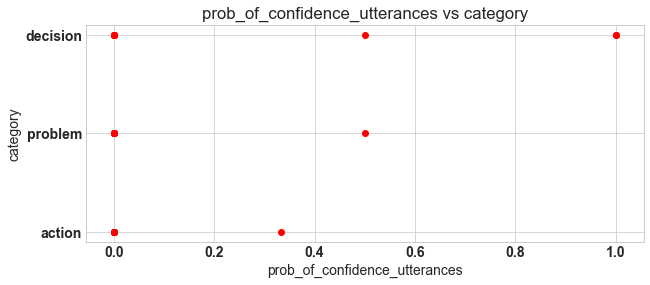

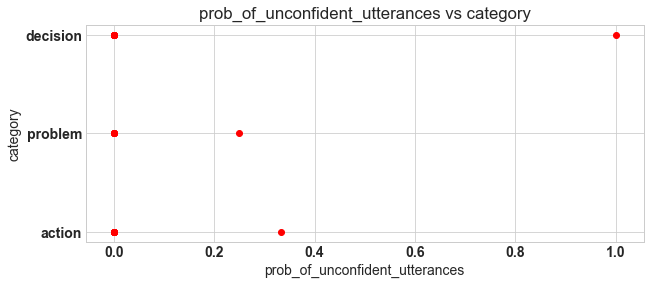

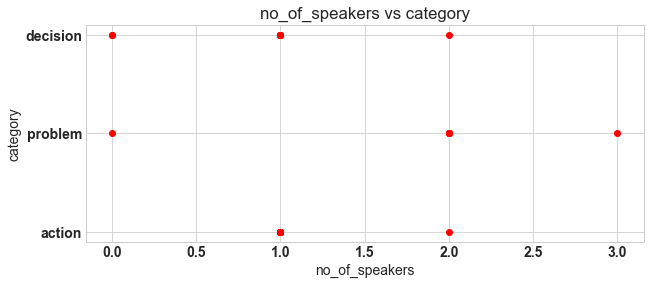

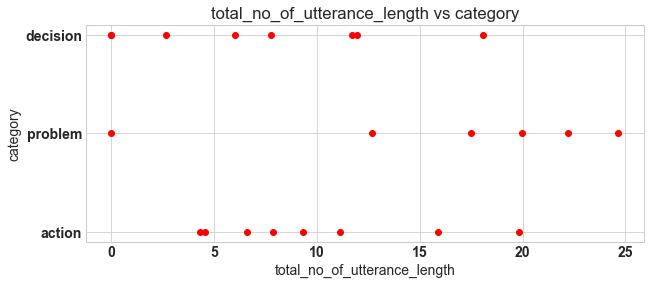

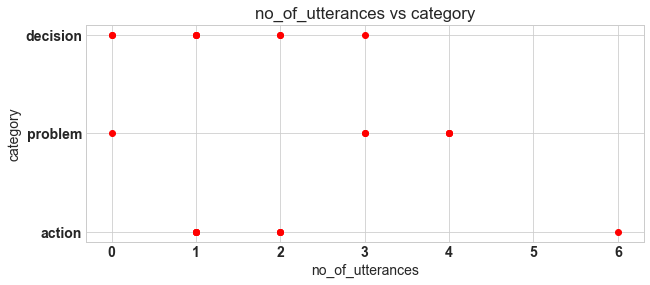

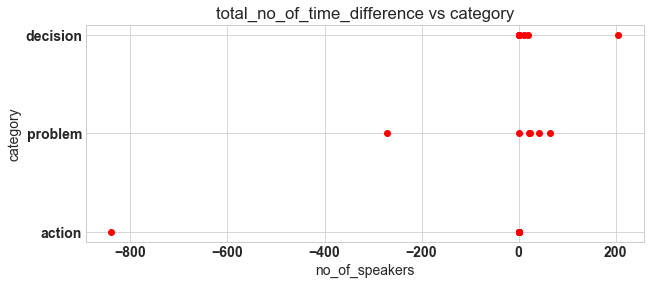

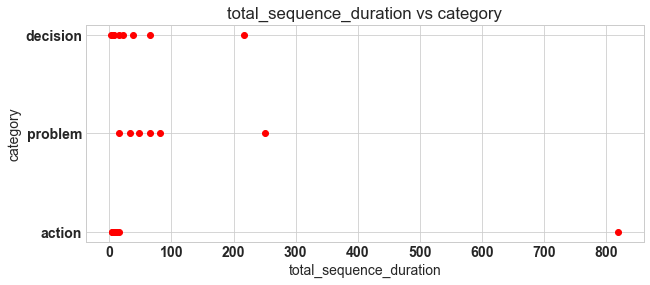

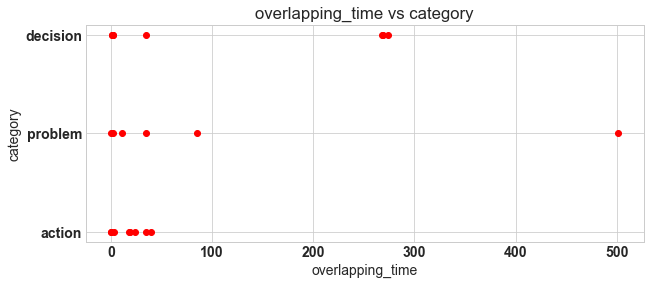

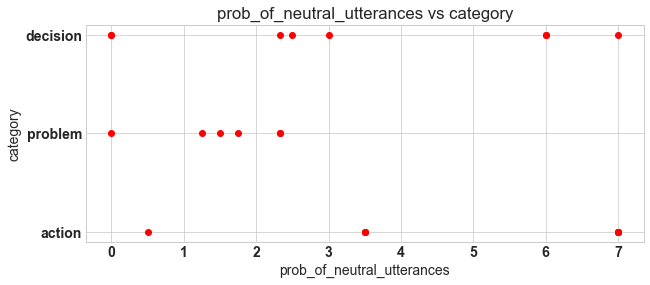

In [23]:
df = pd.read_csv('dataSet.csv')

print('\nNumber of rows and columns in the data set: ', df.shape)
print(df.head())
print('---------------------')

f, ax = plt.subplots(figsize=(10, 4))
plt.xlabel('prob_of_confidence_utterances')
plt.ylabel('category')
plt.title('prob_of_confidence_utterances vs category')
plt.scatter(y=df['category'], x=df['prob_of_confidence_utterances'], color='red')
# plt.show()

f, ax = plt.subplots(figsize=(10, 4))
plt.xlabel('prob_of_unconfident_utterances')
plt.ylabel('category')
plt.title('prob_of_unconfident_utterances vs category')
plt.scatter(y=df['category'], x=df['prob_of_unconfident_utterances'], color='red')
# plt.show()

f, ax = plt.subplots(figsize=(10, 4))
plt.xlabel('no_of_speakers')
plt.ylabel('category')
plt.title('no_of_speakers vs category')
plt.scatter(y=df['category'], x=df['no_of_speakers'], color='red')
# plt.show()

f, ax = plt.subplots(figsize=(10, 4))
plt.xlabel('total_no_of_utterance_length')
plt.ylabel('category')
plt.title('total_no_of_utterance_length vs category')
plt.scatter(y=df['category'], x=df['total_no_of_utterance_length'], color='red')
# plt.show()

f, ax = plt.subplots(figsize=(10, 4))
plt.xlabel('no_of_utterances')
plt.ylabel('category')
plt.title('no_of_utterances vs category')
plt.scatter(y=df['category'], x=df['no_of_utterances'], color='red')
# plt.show()

f, ax = plt.subplots(figsize=(10, 4))
plt.xlabel('no_of_speakers')
plt.ylabel('category')
plt.title('total_no_of_time_difference vs category')
plt.scatter(y=df['category'], x=df['total_no_of_time_difference'], color='red')
# plt.show()

f, ax = plt.subplots(figsize=(10, 4))
plt.xlabel('total_sequence_duration')
plt.ylabel('category')
plt.title('total_sequence_duration vs category')
plt.scatter(y=df['category'], x=df['total_sequence_duration'], color='red')
# plt.show()

f, ax = plt.subplots(figsize=(10, 4))
plt.xlabel('overlapping_time')
plt.ylabel('category')
plt.title('overlapping_time vs category')
plt.scatter(y=df['category'], x=df['overlapping_time'], color='red')
# plt.show()

f, ax = plt.subplots(figsize=(10, 4))
plt.xlabel('prob_of_neutral_utterances')
plt.ylabel('category')
plt.title('prob_of_neutral_utterances vs category')
plt.scatter(y=df['category'], x=df['prob_of_neutral_utterances'], color='red')
# plt.show()

In [24]:
df.head()

,prob_of_confidence_utterances,prob_of_unconfident_utterances,prob_of_neutral_utterances,no_of_speakers,total_no_of_utterance_length,no_of_utterances,total_no_of_time_difference,total_sequence_duration,overlapping_time,category
0,0.0,0.0,7.00,1,9.32,1,0.00,9.32,17.98,action
1,0.0,0.0,7.00,1,4.30,1,0.00,4.30,24.16,action
2,0.0,0.0,3.50,1,11.13,2,1.27,12.40,39.65,action
3,0.5,0.0,1.25,2,19.95,4,-270.55,250.60,0.41,problem
4,0.5,0.0,3.00,1,11.95,2,205.13,217.08,1.90,decision


In [28]:
y_t = np.array(df['category'])
X_t = df
X_t = df.drop(['category'], axis=1)
X_t = np.array(X_t)

print("shape of Y :" + str(y_t.shape))
print("shape of X :" + str(X_t.shape))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_t = scaler.fit_transform(X_t)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_t, y_t, test_size=.20, random_state=42)
print("shape of X Train :" + str(X_train.shape))
print("shape of X Test :" + str(X_test.shape))
print("shape of Y Train :" + str(Y_train.shape))
print("shape of Y Test :" + str(Y_test.shape))

from sklearn.svm import SVC

for this_C in [1, 3, 5, 10, 40, 60, 80, 100]:
    clf = SVC(kernel='linear', C=this_C).fit(X_train, Y_train)
    scoretrain = clf.score(X_train, Y_train)
    scoretest = clf.score(X_test, Y_test)
    print(
        "Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C, scoretrain, scoretest))

from sklearn.model_selection import cross_val_score, StratifiedKFold, LeaveOneOut

clf1 = SVC(kernel='linear', C=20).fit(X_train, Y_train)
scores = cross_val_score(clf1, X_train, Y_train, cv=3)
start_scores = cross_val_score(clf1, X_train, Y_train, cv=StratifiedKFold(3, random_state=10, shuffle=True))
# Loo = LeaveOneOut()
# Loo_scores = cross_val_score(clf1,X_train,Y_train,cv=Loo)
print("The Cross Validation Score :" + str(scores))
print("The Average Cross Validation Score :" + str(scores.mean()))
print("The Stratified Cross Validation Score :" + str(start_scores))
print("The Average Stratified Cross Validation Score :" + str(start_scores.mean()))


shape of Y :(22,)
shape of X :(22, 9)
shape of X Train :(17, 9)
shape of X Test :(5, 9)
shape of Y Train :(17,)
shape of Y Test :(5,)
Linear SVM value of C:1, training score :0.705882 , Test Score: 0.400000 

Linear SVM value of C:3, training score :0.941176 , Test Score: 0.800000 

Linear SVM value of C:5, training score :0.941176 , Test Score: 0.800000 

Linear SVM value of C:10, training score :0.941176 , Test Score: 0.800000 

Linear SVM value of C:40, training score :0.941176 , Test Score: 0.800000 

Linear SVM value of C:60, training score :0.941176 , Test Score: 0.800000 

Linear SVM value of C:80, training score :0.941176 , Test Score: 0.800000 

Linear SVM value of C:100, training score :0.941176 , Test Score: 0.800000 

The Cross Validation Score :[0.42857143 0.4        0.4       ]
The Average Cross Validation Score :0.40952380952380957
The Stratified Cross Validation Score :[0.28571429 0.8        0.6       ]
The Average Stratified Cross Validation Score :0.561904761904762


# KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
error_rate = []  #iterate many models/different k values find find lowest
for i in range (1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

In [31]:
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

Text(0, 0.5, 'Error Rate')

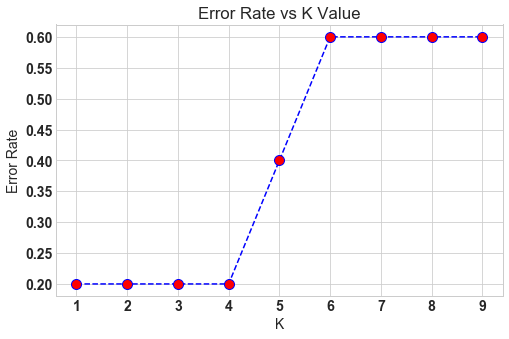

In [32]:

plt.plot(range(1,10), error_rate,color = 'blue', linestyle='dashed', marker ='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
knn = KNeighborsClassifier(n_neighbors=1) #it has minimum
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
print(confusion_matrix(Y_test,pred))

[[2 0 0]
 [1 0 0]
 [0 0 2]]


In [36]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

      action       0.67      1.00      0.80         2
    decision       0.00      0.00      0.00         1
     problem       1.00      1.00      1.00         2

   micro avg       0.80      0.80      0.80         5
   macro avg       0.56      0.67      0.60         5
weighted avg       0.67      0.80      0.72         5



c:\users\chanaka\anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
## Neural Network

In [38]:
from sklearn.neural_network import MLPClassifier

In [39]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [40]:
clf.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [41]:
pred = clf.predict(X_test)

In [42]:
print(confusion_matrix(Y_test,pred))

[[0 2 0]
 [0 1 0]
 [0 2 0]]


In [43]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

      action       0.00      0.00      0.00         2
    decision       0.20      1.00      0.33         1
     problem       0.00      0.00      0.00         2

   micro avg       0.20      0.20      0.20         5
   macro avg       0.07      0.33      0.11         5
weighted avg       0.04      0.20      0.07         5



c:\users\chanaka\anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier() 
# criterion : optional (default=”gini”) 
# splitter : string, optional (default=”best”)
# max_depth : int or None, optional (default=None) 

In [45]:
clf = clf.fit(X_train,Y_train)

In [46]:
pred = clf.predict(X_test)

In [47]:
print(confusion_matrix(Y_test,pred))

[[2 0 0]
 [0 0 1]
 [0 0 2]]


In [48]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

      action       1.00      1.00      1.00         2
    decision       0.00      0.00      0.00         1
     problem       0.67      1.00      0.80         2

   micro avg       0.80      0.80      0.80         5
   macro avg       0.56      0.67      0.60         5
weighted avg       0.67      0.80      0.72         5



c:\users\chanaka\anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
!pip install pydotplus
!conda install graphvizy


  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=467bc595e4538a4e9df727e49ba50f63bc6bab99dadb464a8e5b30808fc36f2c
  Stored in directory: c:\users\chanaka\appdata\local\pip\cache\wheels\1f\5c\ba\f931f74fcac8f48b18ae597279203b1c1f92fc76249c2b6f66
Successfully built pydotplus
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - graphvizy

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




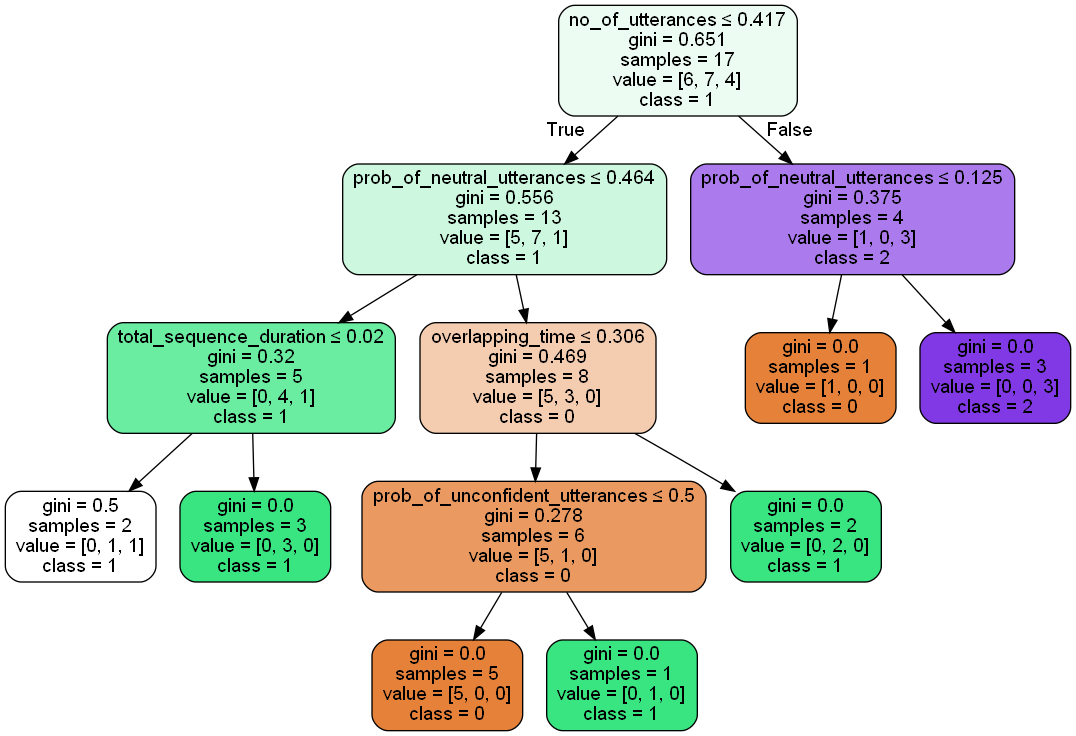

In [50]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ["prob_of_confidence_utterances", "prob_of_unconfident_utterances",           
                                                         "prob_of_neutral_utterances","no_of_speakers", "total_no_of_utterance_length", 
                                                         "no_of_utterances", "total_no_of_time_difference", "total_sequence_duration","overlapping_time"],class_names=['0','1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# Random Forest 

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
clf=RandomForestClassifier(n_estimators=100)

In [53]:
clf.fit(X_train,Y_train)

pred=clf.predict(X_test)

In [54]:
print(confusion_matrix(Y_test,pred))

[[2 0 0]
 [0 0 1]
 [0 0 2]]


In [55]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

      action       1.00      1.00      1.00         2
    decision       0.00      0.00      0.00         1
     problem       0.67      1.00      0.80         2

   micro avg       0.80      0.80      0.80         5
   macro avg       0.56      0.67      0.60         5
weighted avg       0.67      0.80      0.72         5



c:\users\chanaka\anaconda3\envs\py36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
